In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
orig_img = cv2.imread("assets/images/photo_2025-05-27_17-01-25.jpg")
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
seg_mask = cv2.imread("assets/results/resnet34/photo_2025-05-27_17-01-25.png")
seg_mask = cv2.cvtColor(seg_mask, cv2.COLOR_BGR2GRAY)

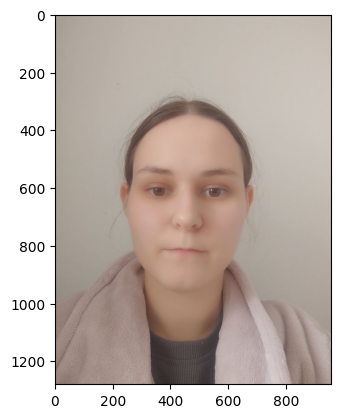

In [3]:
plt.imshow(orig_img)

In [4]:
np.unique(seg_mask)

array([ 0,  1,  2,  4,  7, 10, 12, 13, 14, 16, 17], dtype=uint8)

In [5]:
seg_mask_mouth = seg_mask.copy()
seg_mask_eyes = seg_mask.copy()

seg_mask_eyes[(seg_mask_eyes!=4) & (seg_mask_eyes!=5)] = 0

seg_mask_mouth[(seg_mask_mouth!=11) & (seg_mask_mouth!=12) & (seg_mask_mouth!=13)] = 0


In [6]:
def find_part_rect(part_seg_mask):
    cnt, _ = cv2.findContours(part_seg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if len(cnt) < 1:
        return np.asarray([0,0,0,0])
    print(cnt[0].min(axis=0), cnt[0].max(axis=0))
    return np.asarray(cv2.boundingRect(cnt[0][:,0,:]))

def left_right_eye(seg_mask_eyes):
    cnt, _ = cv2.findContours(seg_mask_eyes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if len(cnt) == 2:
        eyes_rects = [np.asarray(cv2.boundingRect(cnt[i][:,0,:])) for i in range(2)]
        eyes_rects = np.sort(eyes_rects, axis=0)
        print(eyes_rects)
        return eyes_rects
    else:
        print(f"Found {len(cnt)} eyes")

In [7]:
left_eye_rect, right_eye_rect = left_right_eye(seg_mask_eyes)
mouth_rect = find_part_rect(seg_mask_mouth)

[[326 597  63  25]
 [518 600  70  35]]
[[402 808]] [[499 822]]


In [8]:
cnt, _ = cv2.findContours(seg_mask_eyes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
tmp_mask = np.zeros(shape=seg_mask_eyes.shape, dtype=seg_mask_eyes.dtype)
tmp_mask = cv2.drawContours(tmp_mask, cnt, 1, color=255, thickness=cv2.FILLED)

{'m00': 436050.0,
 'm10': 240694755.0,
 'm01': 267729600.0,
 'm20': 132988371885.0,
 'm11': 147784033140.0,
 'm02': 164411137800.0,
 'm30': 73548995379045.0,
 'm21': 81653506184880.0,
 'm12': 90753432944340.0,
 'm03': 100981281324000.0,
 'mu20': 127541511.16665511,
 'mu11': 268713.333320482,
 'mu02': 28294740.350862063,
 'mu30': 88753029.30853811,
 'mu21': -95386504.37539402,
 'mu12': -18304527.63251461,
 'mu03': 20372798.615785718,
 'nu20': 0.0006707782570790591,
 'nu11': 1.4132423218907381e-06,
 'nu02': 0.00014881034765422982,
 'nu30': 7.068747329634769e-07,
 'nu21': -7.597071371420751e-07,
 'nu12': -1.4578666421937677e-07,
 'nu03': 1.62259437153283e-07}

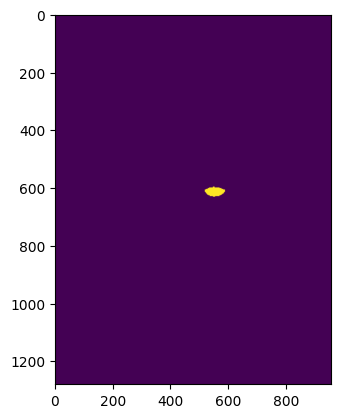

In [9]:
plt.imshow(tmp_mask)
cv2.moments(tmp_mask)

In [10]:
mouth_moments = cv2.moments(seg_mask_mouth)

mouth_x = mouth_moments["m10"] // mouth_moments["m00"]
mouth_y = mouth_moments["m01"] // mouth_moments["m00"]

In [11]:
mxy = np.asarray([mouth_x, mouth_y], dtype=np.int32)


In [12]:
img = orig_img.copy()
img = cv2.rectangle(img.copy(), left_eye_rect[0:2],  left_eye_rect[0:2]+left_eye_rect[2:4],
                    color=(255,255,0), thickness=6)

img = cv2.rectangle(img.copy(), right_eye_rect[0:2],  right_eye_rect[0:2]+right_eye_rect[2:4],
                    color=(255,255,0), thickness=6)

img = cv2.rectangle(img.copy(), mouth_rect[0:2],  mouth_rect[0:2]+mouth_rect[2:4],
                    color=(255,255,0), thickness=6)

img = cv2.drawMarker(img, mxy, color=(255, 0, 0), 
                     markerType=cv2.MARKER_CROSS, 
                     markerSize=10, thickness=10)

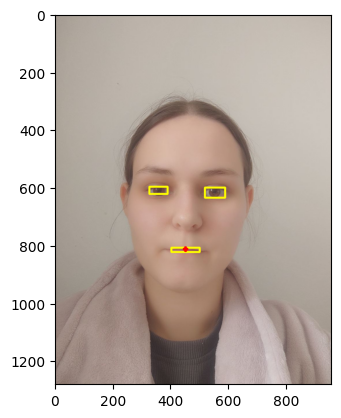

In [13]:
plt.imshow(img)